Image : polygons.png, StartPoint : (19, 59), EndPoint : (52, 44)
polygons.png


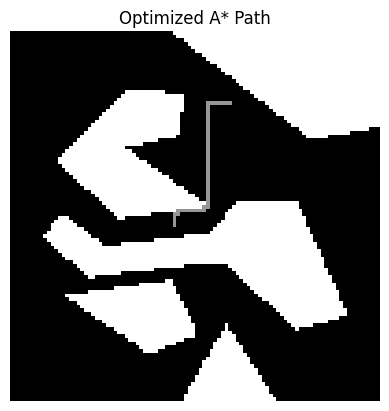

Image : bars.png, StartPoint : (7, 8), EndPoint : (3, 2)
bars.png


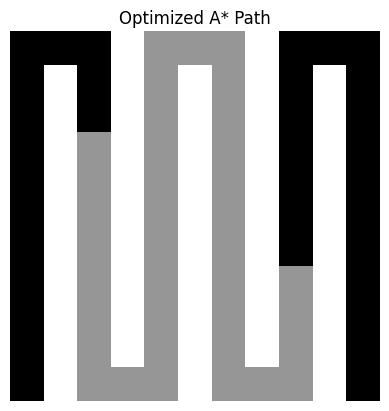

Image : small-ring.png, StartPoint : (4, 3), EndPoint : (3, 4)
small-ring.png


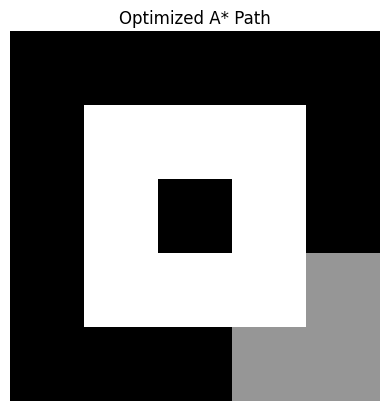

In [ ]:
import heapq
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread, imwrite
from IPython.display import clear_output
from PIL import Image
import random

def readImage(imagePath):
    """
    Reads an image from the specified path and converts it to a numpy array.
    :param imagePath: Path to the image file.
    :return: Numpy array representation of the image.
    """
    image = Image.open(imagePath)  
    numpy_array = np.array(image)
    return numpy_array.astype(np.uint8)


def writeImage(img, path):
    imwrite(path, img.astype(np.uint8))

def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])  # Manhattan

def findPath_astar(startPos, endPos, grid, visualize=False, viz_rate=200):
    rows, cols = grid.shape
    visited = np.zeros((rows, cols), dtype=bool)
    came_from = {}
    g_score = np.full((rows, cols), np.inf, dtype=np.float32)
    #print (g_score)
    g_score[startPos] = 0

    f_start = heuristic(startPos, endPos)
    open_set = [(f_start, startPos)]

    if visualize:
        plt.ion()
        fig, ax = plt.subplots()
        steps = 0

    while open_set:
        f, current = heapq.heappop(open_set)
        if current == endPos:
            return reconstruct_path(came_from, endPos)

        cx, cy = current
        if visited[cx, cy]:
            continue
        visited[cx, cy] = True

        for dx, dy in [(-1,0),(1,0),(0,-1),(0,1)]:
            nx, ny = cx + dx, cy + dy
            if not (0 <= nx < rows and 0 <= ny < cols):
                continue
            if grid[nx, ny] != 0 or visited[nx, ny]:
                continue

            tentative_g = g_score[cx, cy] + 1
            if tentative_g < g_score[nx, ny]:
                g_score[nx, ny] = tentative_g
                f_score = tentative_g + heuristic((nx, ny), endPos)
                came_from[(nx, ny)] = (cx, cy)
                heapq.heappush(open_set, (f_score, (nx, ny)))

                if visualize:
                    steps += 1
                    if steps % viz_rate == 0:
                        grid[nx, ny] = 100
                        clear_output(wait=True)
                        ax.clear()
                        ax.imshow(grid, cmap='gray')
                        plt.title(f"Exploring... {steps} steps")
                        plt.draw()
                        plt.pause(0.001)

    return None  # No path found

def reconstruct_path(came_from, endPos):
    cur = endPos
    path = []
    while cur in came_from:
        path.append(cur)
        cur = came_from[cur]
    path.append(cur)
    return path[::-1]

def colorPath(path, grid, val=100):
    for x, y in path:
        grid[x, y] = val
    return grid

def pathExists(startPos,endPos,imgPath,visualize):
    # Example usage
    img = readImage(imgPath)
    path = findPath_astar(startPos, endPos, img, visualize=False)
    if path:
        img_colored = colorPath(path, img)
        print (imgPath)
        writeImage(img_colored, imgPath.replace(".png", "_path.png"))
        plt.imshow(img_colored, cmap='gray')
        plt.title("Optimized A* Path")
        plt.axis('off')
        plt.show()
    else:
        print("No path found.")

fileList = ["polygons.png","bars.png","small-ring.png"]
for i in range(3):
    file = fileList[i]
    img = readImage(file)
    rows, cols = img.shape
    startPoint = (random.randint(0, rows-1), random.randint(0, cols-1))
    endPoint = (random.randint(0, rows-1), random.randint(0, cols-1))

    while img[startPoint] != 0:
        startPoint = (random.randint(0, rows-1), random.randint(0, cols-1))
    while img[endPoint] != 0:
        endPoint = (random.randint(0, rows-1), random.randint(0, cols-1))
    print("Image : {file}, StartPoint : {startPoint}, EndPoint : {endPoint}".format(file=file, startPoint=startPoint, endPoint=endPoint))
    pathExists(startPoint, endPoint, file, visualize=True)

In [50]:
def multiPathExists(startPosList, endPosList, imgPath, visualize):
    # Example usage
    img = readImage(imgPath)
    for i in range(len(startPosList)):
        path = findPath_astar(startPosList[i], endPosList[i], img, visualize=False)
        if path:
            img = colorPath(path, img, val=(100 + i * 40)%256)  # Different color for each path 
            print(f"Path {i+1} found from {startPosList[i]} to {endPosList[i]}")    
        else:
            print("No path found.")
    writeImage(img, imgPath.replace(".png", "_path.png"))
    plt.imshow(img, cmap='gray')
    plt.title("Optimized A* Path")
    plt.axis('off')
    plt.show()
fileList = ["polygons.png","bars.png","small-ring.png"]

Image : polygons.png, StartPoint1 : (95, 71), EndPoint1 : (79, 61)
Image : polygons.png, StartPoint2 : (79, 50), EndPoint2 : (45, 13)
Path 1 found from (95, 71) to (79, 61)
Path 2 found from (79, 50) to (45, 13)


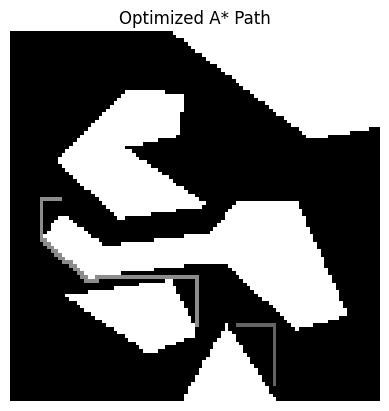

In [53]:
fileList = ["polygons.png","bars.png","small-ring.png"]
for i in range(1):
    file = fileList[i]
    img = readImage(file)
    rows, cols = img.shape
    startPoint1 = (random.randint(0, rows-1), random.randint(0, cols-1))
    endPoint1 = (random.randint(0, rows-1), random.randint(0, cols-1))
    while img[startPoint1] != 0:
        startPoint1 = (random.randint(0, rows-1), random.randint(0, cols-1))
    while img[endPoint1] != 0:
        endPoint1 = (random.randint(0, rows-1), random.randint(0, cols-1))
    startPoint2 = (random.randint(0, rows-1), random.randint(0, cols-1))
    endPoint2 = (random.randint(0, rows-1), random.randint(0, cols-1))
    while img[startPoint2] != 0:
        startPoint2 = (random.randint(0, rows-1), random.randint(0, cols-1))
    while img[endPoint2] != 0:
        endPoint2 = (random.randint(0, rows-1), random.randint(0, cols-1))

    
    startPoints = [] 
    startPoints.append(startPoint1)
    startPoints.append(startPoint2)
    endPoints = []
    endPoints.append(endPoint1)
    endPoints.append(endPoint2)


    print("Image : {file}, StartPoint1 : {startPoint1}, EndPoint1 : {endPoint1}".format(file=file, startPoint1=startPoint1, endPoint1=endPoint1))
    print("Image : {file}, StartPoint2 : {startPoint2}, EndPoint2 : {endPoint2}".format(file=file, startPoint2=startPoint2, endPoint2=endPoint2))   
    multiPathExists(startPoints,endPoints,file, visualize=True)
    